In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from sklearn import tree # visualize final tree
from sklearn import metrics # accuracy & confusion matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Initialize Data

In [2]:
# Load Data
statista = pd.read_csv('Statistic_id1376336-Data-to-CSV.csv')
OSMI = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

In [3]:
# Create Column Lists for Easier Indexing
OSMI_columns = [
    'Does your employer provide mental health benefits as part of healthcare coverage?',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
    'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?',
    'Have you been diagnosed with a mental health condition by a medical professional?',
    'What country do you work in?']

Q1_columns = [
    'Does your employer provide mental health benefits as part of healthcare coverage?',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:']

Q3_columns = [
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
    'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?']

Q4_columns = [
    'Have you been diagnosed with a mental health condition by a medical professional?',
    'What country do you work in?']

In [4]:
# Organize Data (remove uneeded columns)
OSMI = OSMI.loc[:,OSMI_columns]

## Clean Data

Only Question 1 and Question 2 columns have missing values

*   Create a new 'Self-Employed' category for NaN values in Q1 columns
*   Default NaN columns to the maybe categories in Q3 columns



In [5]:
# Clean Data (deal with NaN)
OSMI[Q1_columns] = OSMI.loc[:, Q1_columns].fillna('Self-Employed')

OSMI[Q3_columns[0]] = OSMI.loc[:, Q3_columns[0]].fillna('Maybe/Not sure')
OSMI[Q3_columns[1]] = OSMI.loc[:, Q3_columns[1]].fillna('Maybe')

OSMI

,Does your employer provide mental health benefits as part of healthcare coverage?,Does your employer offer resources to learn more about mental health concerns and options for seeking help?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?,Have you been diagnosed with a mental health condition by a medical professional?,What country do you work in?
0,Not eligible for coverage / N/A,No,Very easy,No,Maybe,Yes,United Kingdom
1,No,Yes,Somewhat easy,No,Maybe,Yes,United States of America
2,No,No,Neither easy nor difficult,Maybe/Not sure,Yes,No,United Kingdom
3,Self-Employed,Self-Employed,Self-Employed,No,Maybe,Yes,United Kingdom
4,Yes,No,Neither easy nor difficult,"Yes, I experienced",Yes,Yes,United States of America
...,...,...,...,...,...,...,...
1428,Self-Employed,Self-Employed,Self-Employed,Maybe/Not sure,Maybe,No,United States of America
1429,Self-Employed,Self-Employed,Self-Employed,Maybe/Not sure,Maybe,Yes,Afghanistan
1430,Yes,Yes,Somewhat difficult,"Yes, I observed",Yes,Yes,United States of America
1431,I don't know,Yes,Somewhat difficult,"Yes, I experienced",Maybe,Yes,United States of America


In [6]:
# Make sure all NaN values were handled
OSMI.isnull().values.any()

np.False_

# Solutions

## Question 1 (Model)

Can we predict how a workplace’s attitude towards mental health (whether
or not they cover care for it and provide resources for getting help) impacts an employee’s perceived ability (on a scale of very easy to very difficult) to take medical leave due to their mental health?

*   Using OSMI data to answer



In [7]:
# Convert category features to numerical
Q1_coverage = OSMI[Q1_columns[0]].replace(['No', 'Yes', 'Not eligible for coverage / N/A', 'Self-Employed', 'I don\'t know'], [0, 1, 2, 3, 4])
Q1_resources = OSMI[Q1_columns[1]].replace(['No', 'Yes', 'Self-Employed', 'I don\'t know'], [0, 1, 2, 3])

# Create Q1 Dataframe
Q1_data = pd.concat([Q1_coverage, Q1_resources], axis=1)
Q1_data = pd.concat([Q1_data, OSMI[Q1_columns[2]]], axis=1)

# Rename columns to shorter nickname
Q1_data.rename(columns={Q1_columns[0]: 'Coverage', Q1_columns[1]: 'Resources', Q1_columns[2]: 'Medical Leave'}, inplace=True)

x = Q1_data[['Coverage', 'Resources']] # Features
y = Q1_data['Medical Leave'] # Response

# Create train and test subsets (80% train; 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

# Fit Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

/tmp/ipython-input-3569989825.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Q1_coverage = OSMI[Q1_columns[0]].replace(['No', 'Yes', 'Not eligible for coverage / N/A', 'Self-Employed', 'I don\'t know'], [0, 1, 2, 3, 4])
/tmp/ipython-input-3569989825.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Q1_resources = OSMI[Q1_columns[1]].replace(['No', 'Yes', 'Self-Employed', 'I don\'t know'], [0, 1, 2, 3])


In [8]:
# Determine Prediction Accuracy
pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, pred))

0.3832752613240418


Text(0.5, 1.0, 'Confusion Matrix')

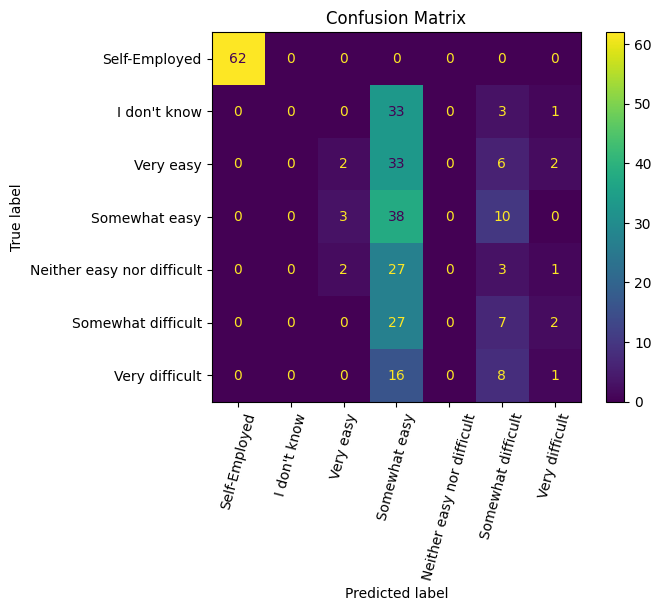

In [9]:
# Create a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test.array, pred, labels=['Self-Employed', 'I don\'t know', 'Very easy', 'Somewhat easy', 'Neither easy nor difficult', 'Somewhat difficult', 'Very difficult'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['Self-Employed', 'I don\'t know', 'Very easy', 'Somewhat easy', 'Neither easy nor difficult', 'Somewhat difficult', 'Very difficult'])

cm_display.plot(xticks_rotation=75)
plt.title('Confusion Matrix')

In [10]:
# Create a dataframe with actual and predicted values
pred = pd.Series(pred)
y_test = y_test.reset_index()
data = {'Actual': y_test.iloc[:,1], 'Predicted': pred}
actual_predicted = pd.concat(data, axis=1)
actual_predicted

,Actual,Predicted
0,Self-Employed,Self-Employed
1,Very easy,Somewhat easy
2,Self-Employed,Self-Employed
3,Somewhat easy,Somewhat easy
4,Somewhat easy,Somewhat easy
...,...,...
282,Very difficult,Somewhat easy
283,Neither easy nor difficult,Somewhat easy
284,I don't know,Somewhat easy
285,Self-Employed,Self-Employed


In [11]:
# Determine the number of correct and incorrect predictions

correct_count = 0

for i in range(287):
  if actual_predicted.iloc[i,0] == actual_predicted.iloc[i,1]:
    correct_count += 1

count = {'correct': correct_count, 'incorrect': 286-correct_count}
count

{'correct': 110, 'incorrect': 176}

In [12]:
# Determine the class order
clf.classes_

array(["I don't know", 'Neither easy nor difficult', 'Self-Employed',
       'Somewhat difficult', 'Somewhat easy', 'Very difficult',
       'Very easy'], dtype=object)

[Text(0.5855263157894737, 0.9166666666666666, 'Coverage <= 2.5\ngini = 0.845\nsamples = 1146\nvalue = [113.0, 145.0, 225.0, 163.0, 230.0, 93.0, 177.0]\nclass = Neither easy nor difficult'),
 Text(0.32894736842105265, 0.75, 'Resources <= 0.5\ngini = 0.819\nsamples = 664\nvalue = [71.0, 103.0, 0.0, 123.0, 165.0, 73.0, 129.0]\nclass = Neither easy nor difficult'),
 Text(0.45723684210526316, 0.8333333333333333, 'True  '),
 Text(0.15789473684210525, 0.5833333333333334, 'Coverage <= 1.5\ngini = 0.82\nsamples = 329\nvalue = [36, 49, 0, 77, 75, 42, 50]\nclass = Somewhat easy'),
 Text(0.10526315789473684, 0.4166666666666667, 'Coverage <= 0.5\ngini = 0.822\nsamples = 285\nvalue = [33, 39, 0, 64, 65, 39, 45]\nclass = Neither easy nor difficult'),
 Text(0.05263157894736842, 0.25, 'gini = 0.82\nsamples = 150\nvalue = [18.0, 21.0, 0.0, 36.0, 33.0, 19.0, 23.0]\nclass = Somewhat easy'),
 Text(0.15789473684210525, 0.25, 'gini = 0.822\nsamples = 135\nvalue = [15, 18, 0, 28, 32, 20, 22]\nclass = Neither 

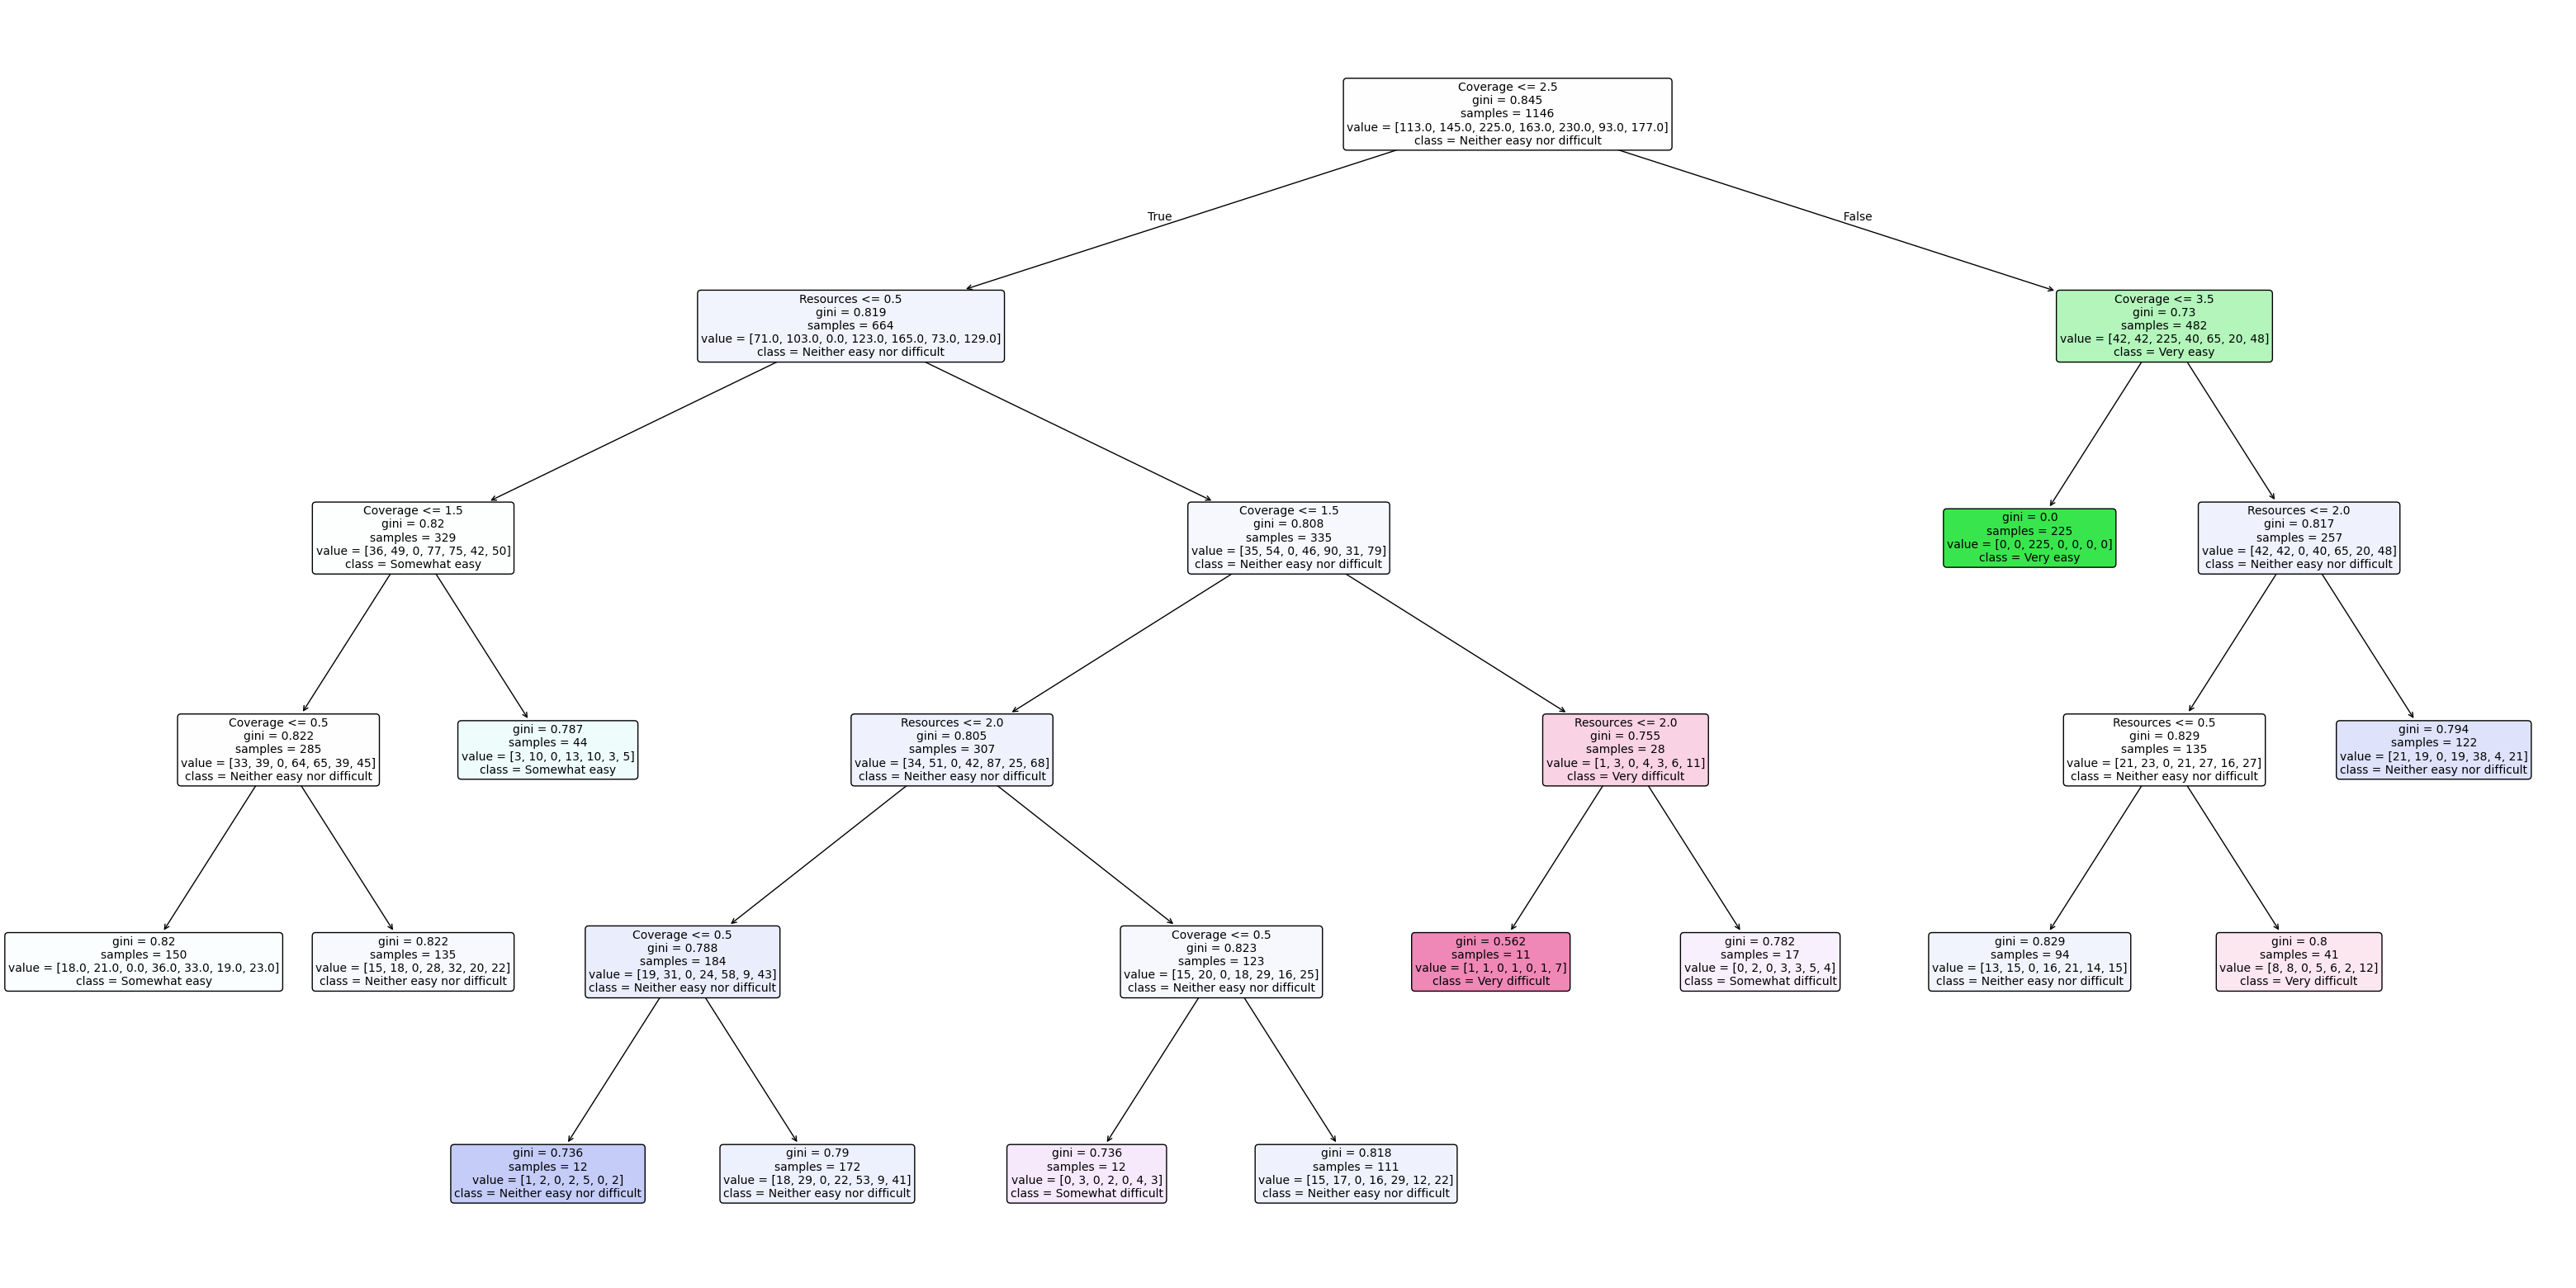

In [13]:
classes = ['Self-Employed', 'I don\'t know', 'Very easy', 'Somewhat easy', 'Neither easy nor difficult', 'Somewhat difficult', 'Very difficult']

# Visualize Decision Tree Classifier
plt.figure(figsize=(40, 20))
tree.plot_tree(clf, feature_names=['Coverage', 'Resources'], class_names=classes, filled=True, fontsize=10, rounded=True)

### Visualization (Not Used)
Below is a visualization not used in the final report. I did not want to delete it though, as it may be useful in the future.

In [14]:
# Create a dataframe with the count of each predicted value for each actual value

Q1_self = actual_predicted[actual_predicted['Predicted'] == 'Self-Employed'].groupby('Actual').size()
Q1_easy = actual_predicted[actual_predicted['Predicted'] == 'Somewhat easy'].groupby('Actual').size()
Q1_difficult = actual_predicted[actual_predicted['Predicted'] == 'Somewhat difficult'].groupby('Actual').size()
Q1_v_easy = actual_predicted[actual_predicted['Predicted'] == 'Very easy'].groupby('Actual').size()
Q1_v_difficult = actual_predicted[actual_predicted['Predicted'] == 'Very difficult'].groupby('Actual').size()

Q1_self = pd.DataFrame(Q1_self)
Q1_self['Predicted'] = 'Self-Employed'

Q1_easy = pd.DataFrame(Q1_easy)
Q1_easy['Predicted'] = 'Somewhat easy'

Q1_difficult = pd.DataFrame(Q1_difficult)
Q1_difficult['Predicted'] = 'Somewhat difficult'

Q1_v_easy = pd.DataFrame(Q1_v_easy)
Q1_v_easy['Predicted'] = 'Very easy'

Q1_v_difficult = pd.DataFrame(Q1_v_difficult)
Q1_v_difficult['Predicted'] = 'Very difficult'

Q1_result_data = pd.concat([Q1_self, Q1_v_easy], axis=0)
Q1_result_data = pd.concat([Q1_result_data, Q1_easy], axis=0)
Q1_result_data = pd.concat([Q1_result_data, Q1_difficult], axis=0)
Q1_result_data = pd.concat([Q1_result_data, Q1_v_difficult], axis=0).reset_index()

Q1_result_data['Actual'] = pd.Categorical(Q1_result_data['Actual'], categories=['Self-Employed', 'I don\'t know', 'Very easy', 'Somewhat easy', 'Neither easy nor difficult', 'Somewhat difficult', 'Very difficult'], ordered=True)

Q1_result_data

,Actual,0,Predicted
0,Self-Employed,62,Self-Employed
1,Neither easy nor difficult,2,Very easy
2,Somewhat easy,3,Very easy
3,Very easy,2,Very easy
4,I don't know,33,Somewhat easy
5,Neither easy nor difficult,27,Somewhat easy
6,Somewhat difficult,27,Somewhat easy
7,Somewhat easy,38,Somewhat easy
8,Very difficult,16,Somewhat easy
9,Very easy,33,Somewhat easy


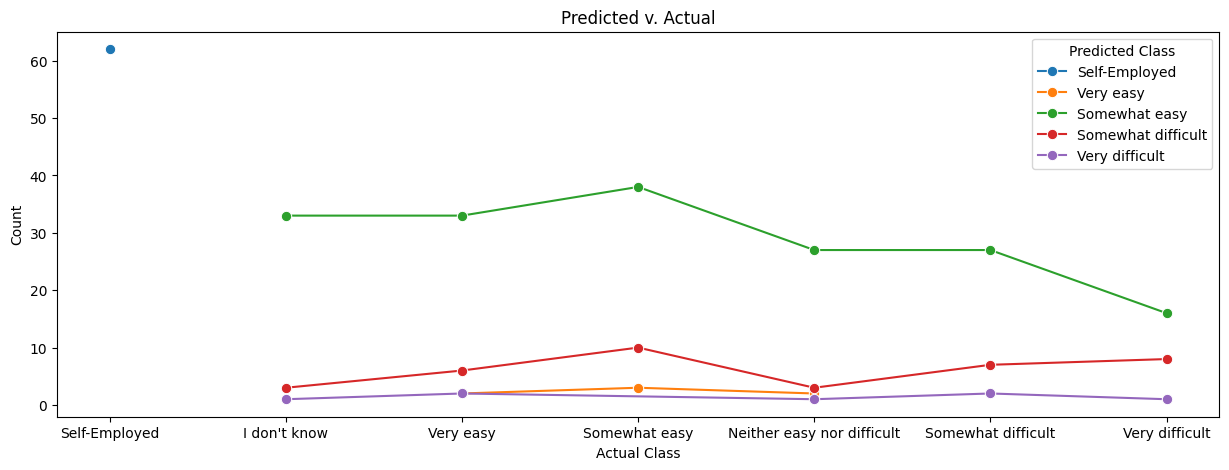

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
seaborn.lineplot(data=Q1_result_data, x='Actual', y=0, hue='Predicted', marker='.', markersize=15)

plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.title('Predicted v. Actual')
plt.legend(title='Predicted Class', loc='best')

## Question 2

How do different age groups view the impact of the workplace on their
mental health (positive or negative impact)?

*   Using Statista data to answer

<br>

### Findings
Younger age groups reported a larger percentage of their work having a negative impact on their mental health. The negative impact percentage continued to drop into the older age groups.

The oldest age group (65+) reported the highest percentage of having a positive impact to their mental health due to their work. Suprisingly, the 50-64 age group had the lowest percentage of a positive impact.

In [16]:
statista

,Age Range,Positive Impact,Negative Impact
0,18-29,31,47
1,30-39,32,45
2,40-49,30,41
3,50-64,27,34
4,65+,43,15


Text(0.5, 1.0, 'Percentage of Different Age Groups who Report Negative Work Impact on Their Mental Health')

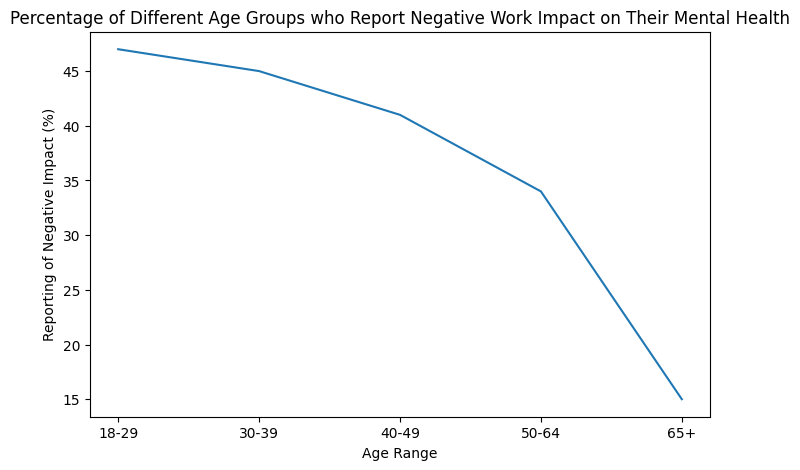

In [17]:
# Negative Impact Plot

fig, ax = plt.subplots(figsize=(8, 5))

seaborn.lineplot(data=statista, y='Negative Impact', x='Age Range')

plt.ylabel('Reporting of Negative Impact (%)')
plt.xlabel('Age Range')
plt.title('Percentage of Different Age Groups who Report Negative Work Impact on Their Mental Health')

Text(0.5, 1.0, 'Percentage of Different Age Groups who Report Positive Work Impact on Their Mental Health')

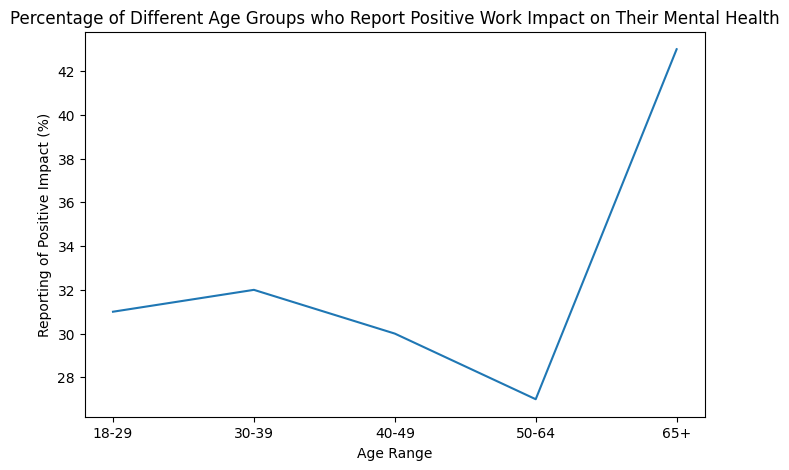

In [18]:
# Positive Impact Plot

fig, ax = plt.subplots(figsize=(8, 5))

seaborn.lineplot(data=statista, y='Positive Impact', x='Age Range')

plt.ylabel('Reporting of Positive Impact (%)')
plt.xlabel('Age Range')
plt.title('Percentage of Different Age Groups who Report Positive Work Impact on Their Mental Health')

## Question 3

Did more employees feel deterred about sharing their mental health in the workplace after witnessing an unsupportive response towards a co-worker sharing theirs?

*   Using OSMI data to answer

Text(0.5, 1.0, 'Count of if Individuals Felt Deterred Based on Observing a Bad Response Towards a Co-Worker')

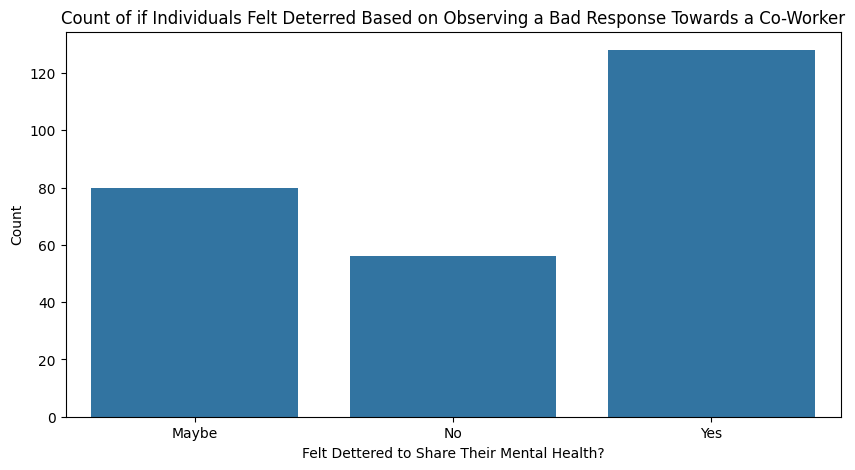

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

seaborn.countplot(data=OSMI[OSMI[Q3_columns[0]] == 'Yes, I observed'], x=Q3_columns[1])

plt.xlabel('Felt Dettered to Share Their Mental Health?')
plt.ylabel('Count')
plt.title('Count of if Individuals Felt Deterred Based on Observing a Bad Response Towards a Co-Worker')

In [20]:
# Create a dataframe with the count of each observation type for each deterred value

Q3_observed = OSMI[OSMI[Q3_columns[0]] == 'Yes, I observed'].groupby(Q3_columns[1]).size()
Q3_experienced = OSMI[OSMI[Q3_columns[0]] == 'Yes, I experienced'].groupby(Q3_columns[1]).size()
Q3_maybe = OSMI[OSMI[Q3_columns[0]] == 'Maybe/Not sure'].groupby(Q3_columns[1]).size()
Q3_no = OSMI[OSMI[Q3_columns[0]] == 'No'].groupby(Q3_columns[1]).size()

Q3_data = pd.concat([Q3_observed, Q3_experienced], axis=0)
Q3_data = pd.concat([Q3_data, Q3_maybe], axis=0)
Q3_data = pd.concat([Q3_data, Q3_no], axis=0).reset_index(name='count')

Q3_data.loc[:2,'observation type'] = 'Observed Bad Response'
Q3_data.loc[3:5,'observation type'] = 'Experienced Bad Response'
Q3_data.loc[6:8,'observation type'] = 'Maybe Experienced/Observe Bad Response'
Q3_data.loc[9,'observation type'] = 'Did Not Experience/Observe Bad Response'

Q3_data[Q3_columns[1]] = pd.Categorical(Q3_data[Q3_columns[1]], categories=['No', 'Maybe', 'Yes'], ordered=True)

Q3_data

,Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?,count,observation type
0,Maybe,80,Observed Bad Response
1,No,56,Observed Bad Response
2,Yes,128,Observed Bad Response
3,Maybe,61,Experienced Bad Response
4,No,41,Experienced Bad Response
5,Yes,65,Experienced Bad Response
6,Maybe,245,Maybe Experienced/Observe Bad Response
7,No,137,Maybe Experienced/Observe Bad Response
8,Yes,53,Maybe Experienced/Observe Bad Response
9,Maybe,567,Did Not Experience/Observe Bad Response


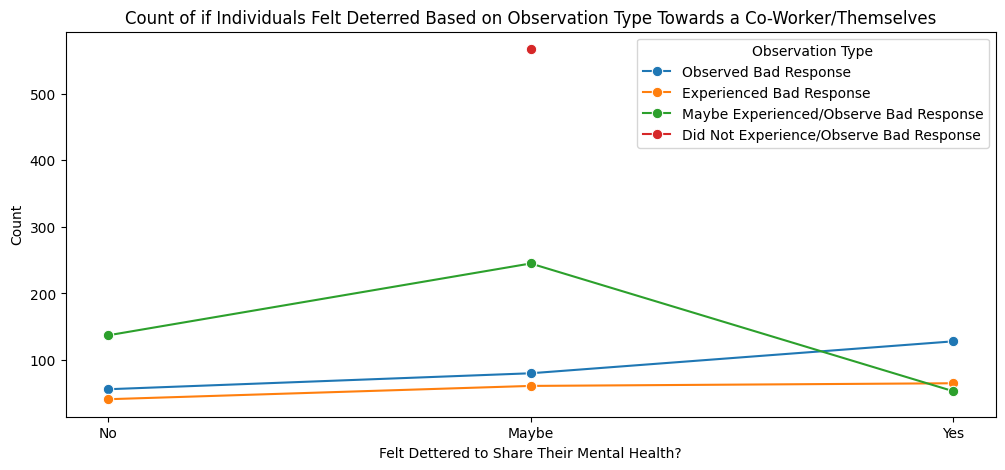

In [21]:
fig, ax = plt.subplots(figsize=(12, 5))

seaborn.lineplot(data=Q3_data, x=Q3_columns[1], y='count', hue='observation type', marker='.', markersize=15)

plt.xlabel('Felt Dettered to Share Their Mental Health?')
plt.ylabel('Count')
plt.title('Count of if Individuals Felt Deterred Based on Observation Type Towards a Co-Worker/Themselves')
plt.legend(title='Observation Type', loc='best')

## Question 4

How does the rate of a professional diagnosis of mental health conditions compare across different countries? In other words, does one country have significantly more diagnoses than the others?

*   Using OSMI data to answer


In [32]:
# Get country count
count = OSMI.groupby([Q4_columns[1]]).size().sort_values(ascending=False)
count.name = 'count'
count

,count
What country do you work in?,
United States of America,851
United Kingdom,183
Canada,74
Germany,58
Netherlands,47
Australia,34
Sweden,20
Ireland,15
France,14


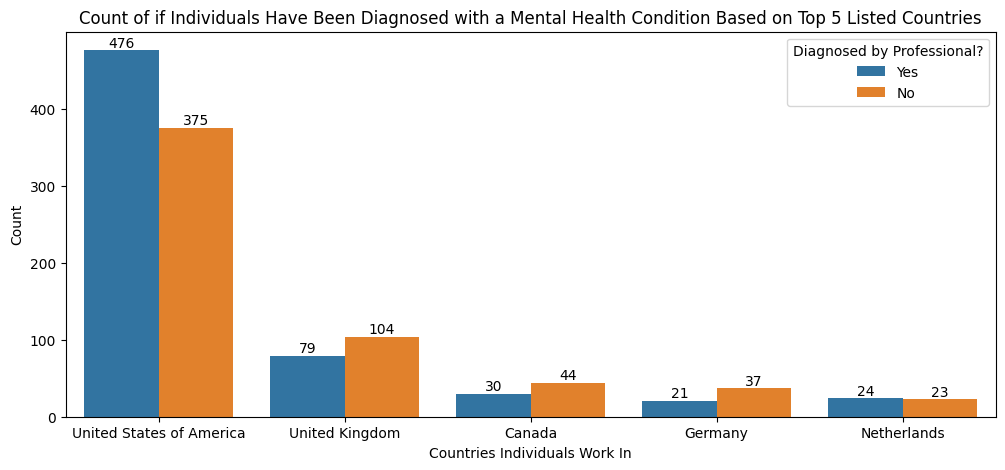

In [22]:
countries=['United States of America', 'United Kingdom', 'Canada', 'Germany', 'Netherlands']
Q4_data = OSMI[OSMI.loc[:,Q4_columns[1]].isin(countries)]

fig, ax = plt.subplots(figsize=(12, 5))

bar = seaborn.countplot(data=Q4_data, x=Q4_columns[1], hue=Q4_columns[0], order=countries)

bar.bar_label(ax.containers[0], fontsize=10)
bar.bar_label(ax.containers[1], fontsize=10)


plt.xlabel('Countries Individuals Work In')
plt.ylabel('Count')
plt.title('Count of if Individuals Have Been Diagnosed with a Mental Health Condition Based on Top 5 Listed Countries')
plt.legend(title='Diagnosed by Professional?', loc='best')

In [33]:
# Get total, yes, and no count for each country

Q4_yes = OSMI[OSMI[Q4_columns[0]]  == 'Yes'].groupby([Q4_columns[1]]).size().sort_values(ascending=False)
Q4_yes.name = 'yes'
Q4_no = OSMI[OSMI[Q4_columns[0]]  == 'No'].groupby([Q4_columns[1]]).size().sort_values(ascending=False)
Q4_no.name = 'no'

country_count = pd.concat([count, Q4_yes], axis=1)
country_count = pd.concat([country_count, Q4_no], axis=1)

country_count

,count,yes,no
What country do you work in?,,,
United States of America,851,476.0,375.0
United Kingdom,183,79.0,104.0
Canada,74,30.0,44.0
Germany,58,21.0,37.0
Netherlands,47,24.0,23.0
Australia,34,23.0,11.0
Sweden,20,7.0,13.0
Ireland,15,8.0,7.0
France,14,3.0,11.0
